In [1]:
import pandas as pd
from PIL import Image, ImageFilter
from math import floor
import matplotlib.pyplot as plt
import numpy as np 
import math
from skimage import io
from sklearn.cluster import KMeans
from sklearn.utils import shuffle


# Question 1 - interpolation

In [3]:
lenna_img = Image.open(r"C:\Users\nnaro\OneDrive\Pictures\lenna.jpg")


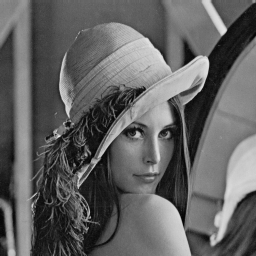

In [4]:
lenna_img

In [5]:
print(lenna_img.format)

JPEG


In [6]:
print(lenna_img.size)

(256, 256)


In [7]:
print(lenna_img.mode)

L


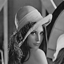

In [8]:
lenna_resize = lenna_img.resize((64,64))
lenna_resize

In [9]:
print(lenna_resize.size)

(64, 64)


#nearest neighbor interpolation

256 256
64 64
0.25 0.25


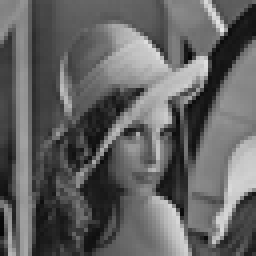

In [10]:
#Nearest neighbour interpolation function

def nearest_neighbor1(img, new_h, new_w):
    print(new_h, new_w)
    old_w, old_h = img.size
    print(old_h,old_w)
    retimg = np.zeros((new_h, new_w),dtype=np.uint8)
    
    w_ratio = old_w/float(new_w)
    h_ratio = old_h/float(new_h)
    print(w_ratio, h_ratio)

    for i in range(new_h):
        old_y = floor(i * h_ratio)
        for j in range(new_w):
            old_x = floor(j * w_ratio)
            retimg[i][j] = img.getpixel((old_x ,old_y))
    return retimg

image1=nearest_neighbor1(lenna_resize,lenna_resize.size[1]*4,lenna_resize.size[0]*4)
image1=Image.fromarray(image1)
image1

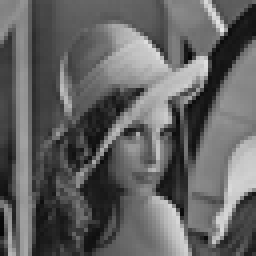

In [11]:
#nearest neighbour interpolation python library

lenna_interpolate = lenna_resize.resize([256, 256], Image.NEAREST)
lenna_interpolate

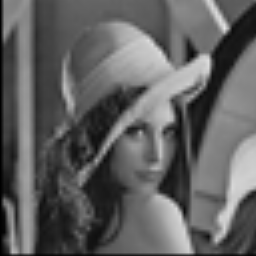

In [12]:
#bilinear interpolation function code

def BiLinear1(img,newHeight,newWidth):
    old_w,old_h =img.size
    img=np.pad(img,((0,1),(1,0)),'constant')
    retimg=np.zeros((newHeight,newWidth),dtype=np.uint8)
    w_ratio = old_w/float(newWidth)
    h_ratio = old_h/float(newHeight)

    for i in range(newHeight):
        oldy = i * h_ratio
        for j in range(newWidth):
            oldx = j * w_ratio
            x=math.floor(oldx)
            y=math.floor(oldy)
            u=oldx-x
            v=oldy-y
            retimg[j][i]= (1-u)*(1-v)*img[x][y] \
                            + u*(1-v)*img[x+1][y] \
                            + (1-u)*v*img[x][y+1] \
                            + u*v*img[x+1][y+1]
    return retimg

image2=BiLinear1(lenna_resize,lenna_resize.size[1]*4,lenna_resize.size[0]*4)
image2=Image.fromarray(image2)
image2

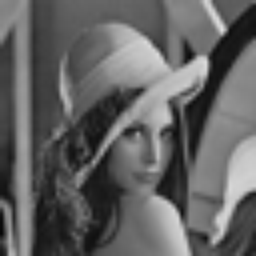

In [13]:
#bilinear interpolation python library
lenna_interpolate_bi = lenna_resize.resize([256, 256], Image.BILINEAR)
lenna_interpolate_bi

# average error interpolation(nearest neighbor and bilinear)

In [14]:
#lenna_img: orig 256 x 256
#image1, image2: 256 x256 - approx

#sum(sum(lenna_img.getpixel((i, j)) - image1.getpixel((i, j))) - normalize
#lenna_img, image1: PIL.image -> np.array

lenna_img_np = np.asarray(lenna_img)
image1_np = np.asarray(image1)

diff1 = abs(lenna_img_np - image1_np)
nrows, ncols = diff1.shape

avg_err = sum(sum(diff1))/(nrows*ncols)

avg_err


0.5359344482421875

In [15]:
lenna_img_np = np.asarray(lenna_img)
image2_np = np.asarray(image2)

diff2 = abs(lenna_img_np - image2_np)
nrows, ncols = diff2.shape

avg_err2 = sum(sum(diff2))/(nrows*ncols)

avg_err2


0.5034332275390625

In my observation with reference to the average error in both the nearest neighbour and bilinear interpolation compared to the original image, it's obvious that the nearest neighbour comparison has a slighly higher error than that of the bilinear interpolation. Also from my observation, the higher the error, the more fuzzy the image.So, bilinear interpolation produces a better quality image than the nearest neighbor.

# question  2 - quantization and dithering

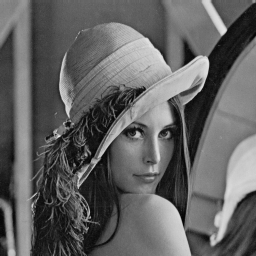

In [16]:
lenna_img

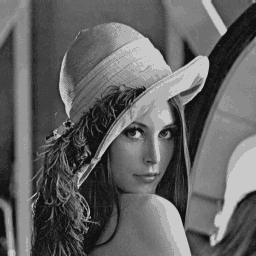

In [17]:
#linear quantizer
lenna_img_quan = lenna_img.quantize(16)
lenna_img_quan

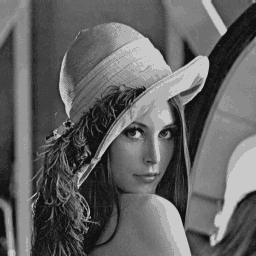

In [18]:
#Random dither B=4

lenna_img_dither = lenna_img.quantize(16,dither = 1)
lenna_img_dither


#  average error quantizer and dithering and original

In [19]:
#average error between original image and quantizer

lenna_img_np = np.asarray(lenna_img)
image3_np = np.asarray(lenna_img_quan)

diff3 = abs(lenna_img_np - image3_np)
nrows, ncols = diff3.shape

avg_err3 = sum(sum(diff3))/(nrows*ncols)

avg_err3

0.5120086669921875

In [20]:
#average error between original image and dithering

lenna_img_np = np.asarray(lenna_img)
image4_np = np.asarray(lenna_img_dither)

diff4 = abs(lenna_img_np - image4_np)
nrows, ncols = diff4.shape

avg_err4 = sum(sum(diff4))/(nrows*ncols)

avg_err4

0.5120086669921875

For the average error between using the quantizer and dithering method, I don't see any difference in the two errors (0.51). However, the quality of the image is a lower grade from the original image.

# question 3

what color would the person see in the middle?

colour in the middle (0.5, 1.0, 0.5)
RGB (255/2 , 255, 255/2) = RGB (152, 255, 152)

According to the rbga codes, with 255 in the middle(0,255,0), we have lime. The 0.5 on the right and left of (0.5,1.0,0.5) is giving us grey. So we have lime mixed with grey. when checking the color chart we have (152,251,152) as pale green, which is very close to (152, 255,152)
